### 01 - Problem (Case Study)

#### Data Description

"Marketing Customer Analysis" dataset contains insurance customer data. The dataset contains 10910 rows and 29 columns. It contains identification data, financial data, time data, and other dimensions. More technical description details on the data are found below.

#### Goal

Using "Marketing Customer Analysis", we are going to understand, clean and transform the data and finally evaluate different models to predict the Total Claim Amount for a Customer.  

### 02 - Getting Data

In [450]:
#Importing the needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [451]:
#Reading the file

df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


### 03 - Cleaning/Wrangling/EDA

In [452]:
# Standardizing header names.

df.columns=df.columns.str.replace(' ','_') 
df.columns = df.columns.str.lower()
df = df.rename(columns={'employmentstatus':'employment_status'})
df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [453]:
#Checking the NaN values

count = df.isna().sum()
count

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employment_status                   0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [454]:
# 5.Replacing the NaN values with "0"
df = df.fillna(0)

In [455]:
# 5.Checking for `NaN` values after replacing them with "0"
df.isna().sum()

unnamed:_0                       0
customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

In [456]:
#The columns that are categorical:

df.select_dtypes(include=object).columns.tolist()

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [457]:
#The columns that are numerical:

df.select_dtypes(include=np.number).columns.tolist()

['unnamed:_0',
 'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

### Exploring the data


In [458]:
#Showing DataFrame info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employment_status              10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [459]:
#Describing DataFrame

df.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,14.270119,48.091934,0.361962,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.404862,27.940675,0.890134,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,5.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,13.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [460]:
df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

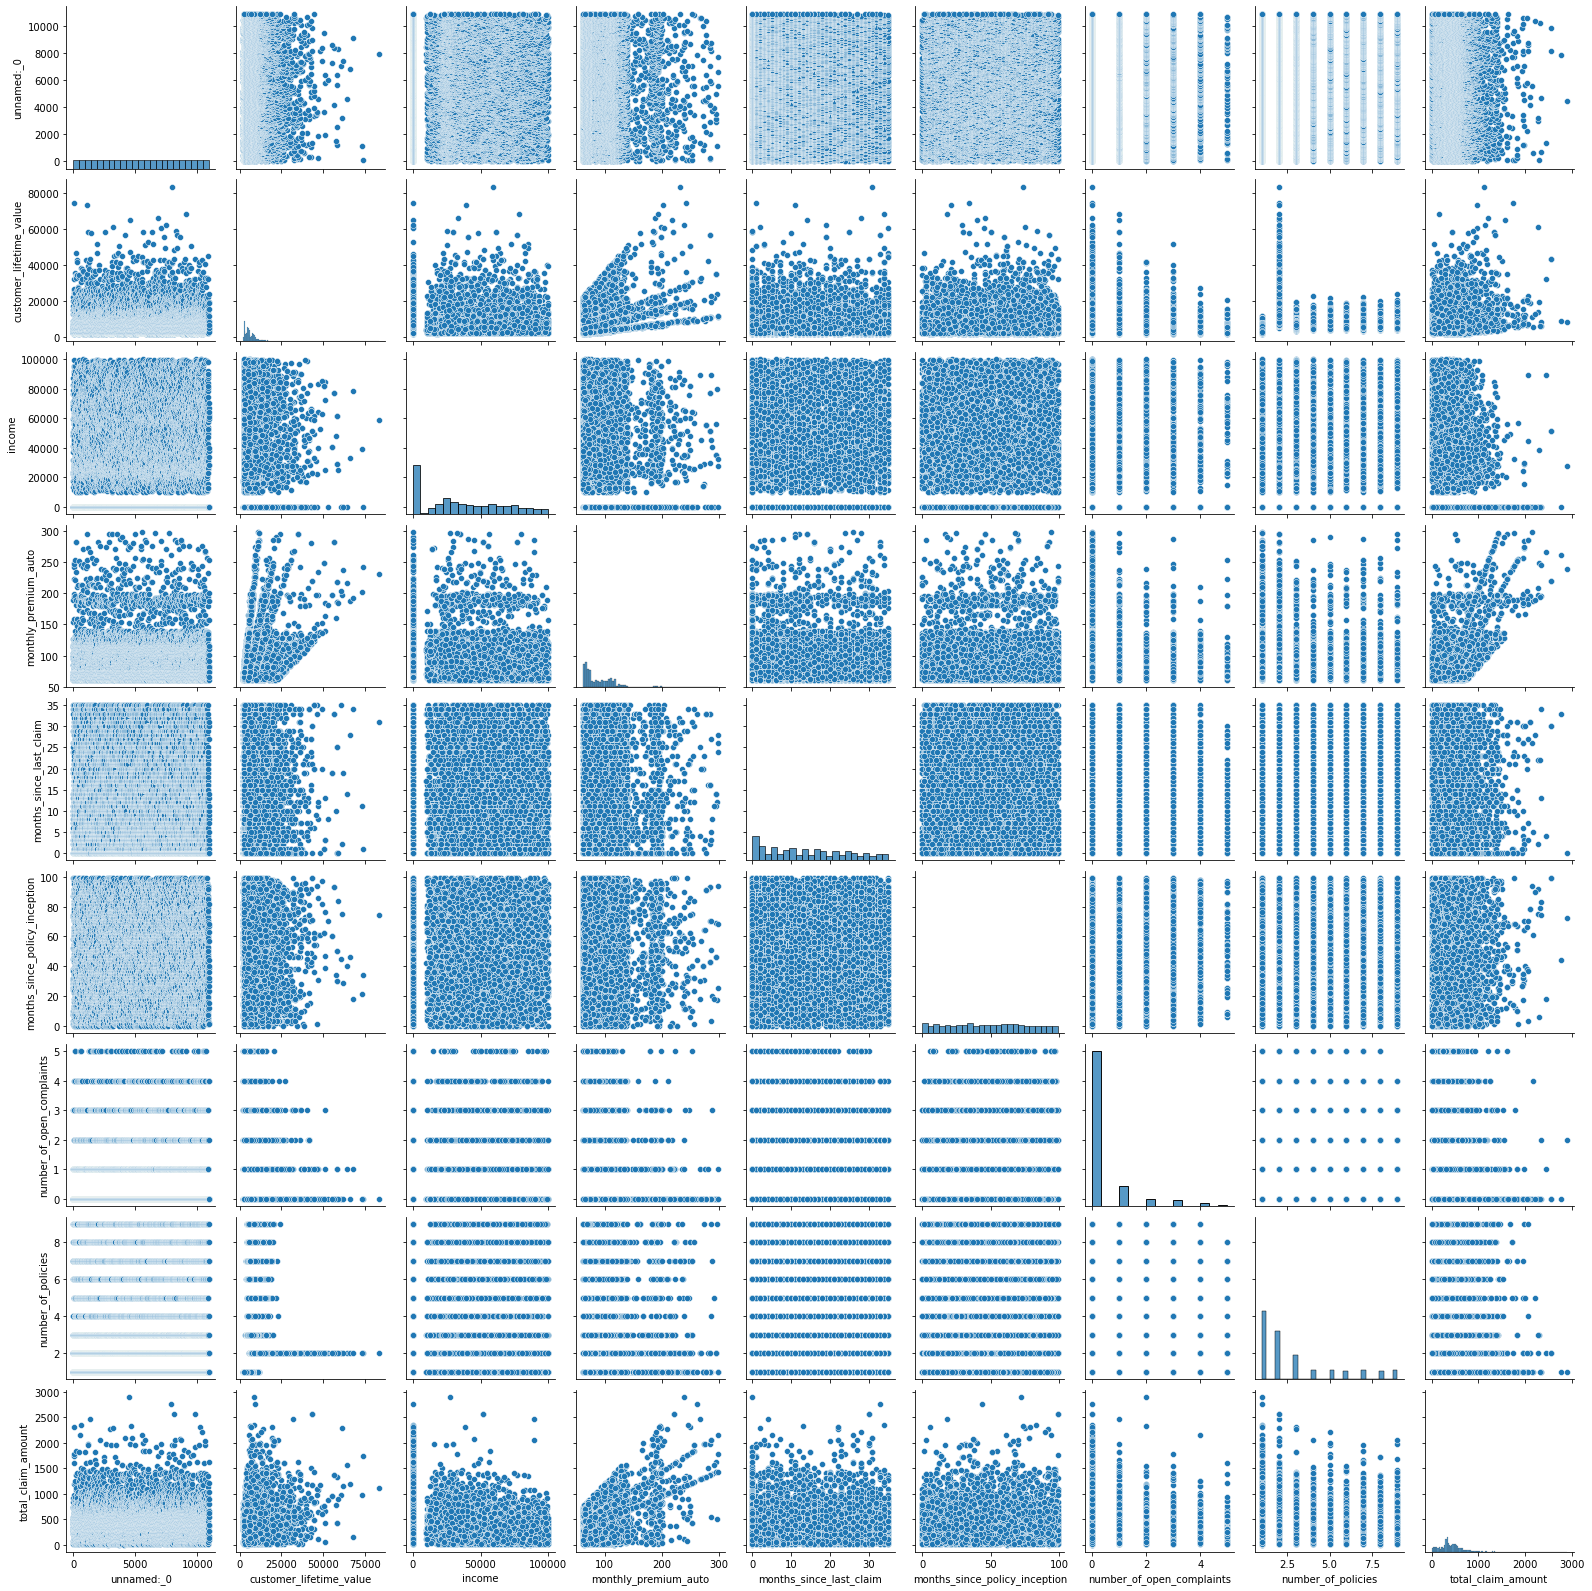

In [461]:
#Pairplots

sns.pairplot(df)

In [462]:
#Correlations with table and plots. 

df_corr = df.corr()
df_corr

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
unnamed:_0,1.000000,0.001355,0.008910,0.000863,0.013572,0.012795,0.008943,0.002319,-0.000593
customer_lifetime_value,0.001355,1.000000,0.028306,0.403069,0.017189,0.016960,-0.030616,0.016024,0.232626
income,0.008910,0.028306,1.000000,-0.009788,-0.016671,-0.005903,0.008425,-0.009960,-0.354141
monthly_premium_auto,0.000863,0.403069,-0.009788,1.000000,0.007845,0.018953,-0.010059,-0.020505,0.631799
months_since_last_claim,0.013572,0.017189,-0.016671,0.007845,1.000000,-0.036081,0.036455,-0.000649,0.007210
months_since_policy_inception,0.012795,0.016960,-0.005903,0.018953,-0.036081,1.000000,0.004165,-0.009123,0.003095
number_of_open_complaints,0.008943,-0.030616,0.008425,-0.010059,0.036455,0.004165,1.000000,0.001681,-0.012380
number_of_policies,0.002319,0.016024,-0.009960,-0.020505,-0.000649,-0.009123,0.001681,1.000000,-0.008923
total_claim_amount,-0.000593,0.232626,-0.354141,0.631799,0.007210,0.003095,-0.012380,-0.008923,1.000000


In [463]:
df.gender.unique()

array(['M', 'F'], dtype=object)

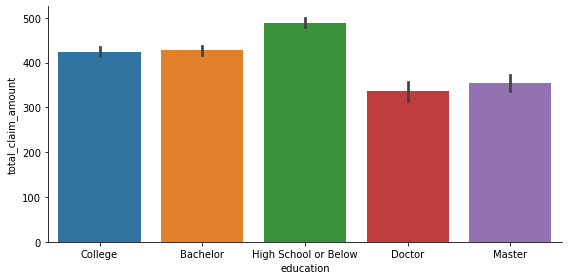

In [464]:
sns.catplot(x = "education", y = "total_claim_amount", data=df, kind = "bar", height = 4, aspect = 2)

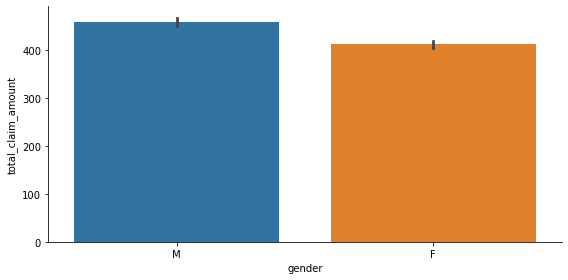

In [465]:
sns.catplot(x= "gender",y = "total_claim_amount", data = df, kind = "bar", height = 4, aspect = 2)

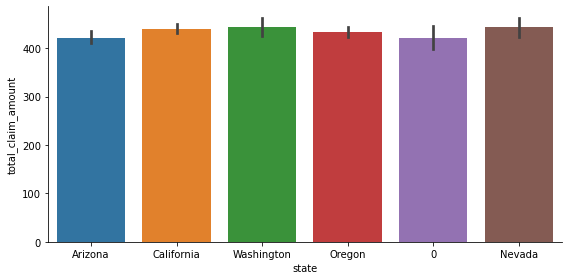

In [466]:
sns.catplot(x= "state", y = "total_claim_amount", data = df, kind = "bar", height = 4, aspect = 2)

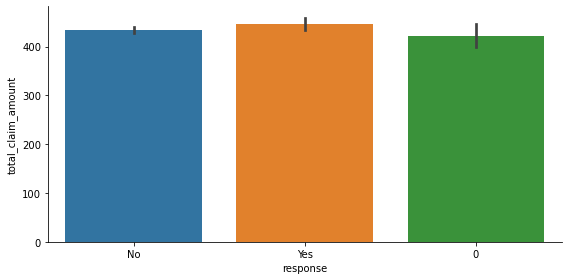

In [467]:
sns.catplot(x= "response", y = "total_claim_amount", data = df, kind = "bar", height = 4, aspect = 2)


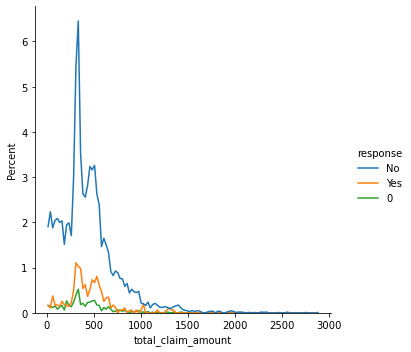

In [468]:
#Showing a plot of the response rate by the total claim amount

sns.displot(
    data=df, x="total_claim_amount", hue="response",
    kind="hist", stat="percent", element="poly", fill=False
)

### 0.4 - Processing Data

In [469]:
#Dealing with outliers.
#Normalization.
#Encoding Categorical Data.
#Splitting into train set and test set.

In [470]:
from scipy import stats 

numerical = df[df.select_dtypes(include=np.number).columns]
numerical

from scipy import stats 


for col in numerical.columns:
    
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]
    
    
    #fill missing values with mean
    df[col]= df[col].fillna(np.mean(df[col]))
    
    #adjusting skewed features into a more mormal bell-shape.
    df[col] = df[col].apply(log_transfom_clean1)

df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
1,0.000000,KX64629,California,3.348018,No,Basic,College,1/18/11,Unemployed,F,...,0,0.000000,Personal Auto,Personal L3,Offer4,Call Center,2.872112,Four-Door Car,Medsize,0
2,0.301030,LZ68649,Washington,4.174581,No,Basic,Bachelor,2/10/11,Employed,M,...,0,0.301030,Personal Auto,Personal L3,Offer3,Call Center,2.681241,SUV,Medsize,A
4,0.602060,QA50777,Oregon,3.955450,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,0,0.845098,Personal Auto,Personal L2,Offer1,Branch,2.849988,Four-Door Car,Medsize,0
5,0.698970,HO81102,0,3.676253,0,Basic,High School or Below,2/14/11,Employed,M,...,0,0.845098,Personal Auto,Personal L3,Offer1,Agent,2.466571,Four-Door Car,Medsize,A
7,0.845098,IH64929,California,3.695153,No,Basic,High School or Below,2/24/11,Employed,M,...,0,0.477121,Personal Auto,Personal L2,Offer2,Branch,2.393404,Two-Door Car,Medsize,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10895,4.037227,EG40670,California,3.794675,No,Extended,Bachelor,1/8/11,Disabled,F,...,0,0.845098,Special Auto,Special L3,Offer1,Agent,2.730593,Four-Door Car,Medsize,A
10897,4.037307,MM70762,Arizona,3.957883,Yes,Basic,Master,1/26/11,Employed,M,...,0,0.903090,Personal Auto,Personal L1,Offer1,Agent,2.198870,Sports Car,Medsize,A
10898,4.037347,SO95845,California,3.764001,No,Basic,College,1/7/11,Employed,F,...,0,0.845098,Personal Auto,Personal L3,Offer4,Call Center,2.127033,Two-Door Car,Medsize,0
10901,4.037466,RY92254,Washington,3.657810,No,Premium,Bachelor,1/13/11,Employed,M,...,0,0.000000,Personal Auto,Personal L3,Offer4,Agent,2.903946,Two-Door Car,Medsize,0


In [471]:
#Encoding categorical data


df["customer"].unique() 
df["state"].unique()
df["response"].unique()
df["coverage"].unique()
df["education"].unique()
df["effective_to_date"].unique()
df["employment_status"].unique()
df["gender"].unique()
df["location_code"].unique()
df["marital_status"].unique()
df["policy_type"].unique()
df["policy"].unique()
df["renew_offer_type"].unique()
df["sales_channel"].unique()
df["vehicle_class"].unique()
df["vehicle_size"].unique()
df["vehicle_type"].unique()



x = df.iloc[: ,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25]] #Explanatory variables
y = df.iloc[:, [22]] # Target variable

# Transforming categorical variables
x = pd.get_dummies(x, drop_first = True)



In [472]:
df.columns


Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [473]:
#x-y split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer_AA35519,customer_AA56476,...,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small,vehicle_type_A
7776,3.890756,3.650969,0.000000,1.792392,1.342423,1.662758,0,0.477121,0,0,...,0,0,1,0,0,0,0,1,0,0
1945,3.288920,3.394050,4.646208,1.792392,1.397940,0.477121,0,0.000000,0,0,...,1,0,0,0,0,1,0,1,0,1
10190,4.008174,3.386543,0.000000,1.857332,1.447158,1.806180,0,0.000000,0,0,...,0,1,0,0,0,1,0,1,0,0
2170,3.336460,3.760230,4.949375,1.857332,0.954243,1.851258,0,0.477121,0,0,...,0,0,1,0,0,0,0,0,1,0
7423,3.870579,4.065386,0.000000,2.053078,1.505150,1.819544,0,0.301030,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837,3.766190,3.798647,4.388758,1.897627,1.176091,1.505150,0,0.477121,0,0,...,1,0,1,0,0,0,0,0,1,0
7975,3.901731,3.932952,4.999144,1.851258,0.000000,1.826075,0,0.301030,0,0,...,1,0,1,0,0,0,0,0,1,1
8024,3.904391,4.027630,4.860578,1.944483,0.845098,0.477121,0,0.301030,0,0,...,1,0,0,0,0,1,0,1,0,1
8266,3.917295,3.715288,4.936770,1.812913,0.000000,1.995635,0,0.477121,0,0,...,0,0,0,0,0,1,0,1,0,0


In [474]:
print("Number of Rows of x_train = {}".format(len(x_train)))
print("Number of Rows of x_test = {}".format(len(x_test)))
print("Number of Rows of y_train = {}".format(len(y_train)))
print("Number of Rows of y_test = {}".format(len(y_test)))

Number of Rows of x_train = 5328
Number of Rows of x_test = 1777
Number of Rows of y_train = 5328
Number of Rows of y_test = 1777


In [475]:
# fit and transform train data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test =  sc_x.transform(x_test)

### 05 - Modeling

In [476]:
#Creating the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [477]:
y_train

,total_claim_amount
7776,2.473633
1945,2.114941
10190,2.538574
2170,2.240653
7423,2.910411
...,...
5837,2.578868
7975,2.276791
8024,2.800540
8266,0.891709


In [478]:
reg.fit(x_train,y_train)

LinearRegression()

In [479]:
reg.coef_
predictions_train = reg.predict(x_train)

In [480]:
predictions_train.size

5328

In [481]:
x_train.shape
x_train.size

32351616

### 06 - Model Validation

In [482]:
#MSE(Mean Squared Error)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,predictions_train)

4.6696649039926574e-30

In [483]:
predictions_test = reg.predict(x_test)

In [484]:
mean_squared_error(y_test,predictions_test)

0.05605765704928351

In [485]:
#R2(R-Squared)

from sklearn.metrics import r2_score
display(r2_score(y_train,predictions_train))
r2_score(y_test,predictions_test)

1.0

0.5623790729270101

In [486]:
#RMSE(Root Mean Squared Error)

rmse_test = mean_squared_error(y_test,predictions_test,squared = False)
rmse_test

0.2367649827345326

In [487]:
rmse_train = mean_squared_error(y_train,predictions_train,squared = False)
rmse_train

2.160940745136862e-15

In [488]:
#MAE(Mean Absolute Error)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,predictions_train)

1.527775653734601e-15

In [489]:
mean_absolute_error(y_test,predictions_test)

0.134492549516225

### 07 - Reporting

R2: 0.46 - Means that 46% of the changeability of the dependent output attribute, can be explained by the model. This means that the model is not performing very good. R2 is not the best measure here as it does not consider overfitting. 
MSE: 0.083 - This is close to zero, which means the prediction is pretty accurate. 
RMSE: 0.28 - This is also close to zero which means the model is good with the predictions.
MAE: 0.15 - This means that the MAE is only 0.15 away from the predicted value, which means that it is small change, and the model is good. 

As a conclusion, our model seems to be a good model for predicting the Total Claim Amount in our dataset. 
